<a href="https://colab.research.google.com/github/abhijeet181995/My-Site/blob/master/SSDProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bibtexparser
import bibtexparser
import pandas as pd
from matplotlib import pyplot as plt

# Final Code

## Make sure to save your changes
# ADD ISSUES HERE

- LABEL X AND LABEL Y AXIS
- SORT 

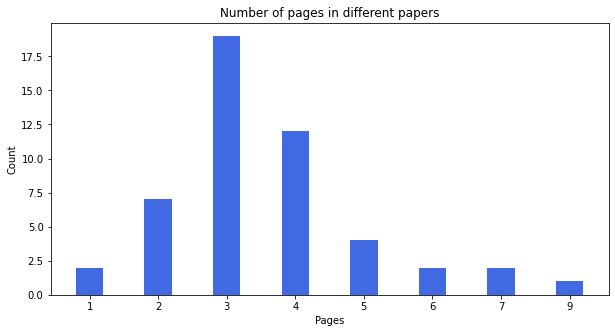

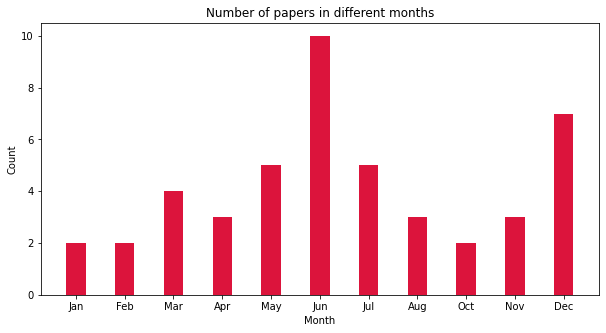

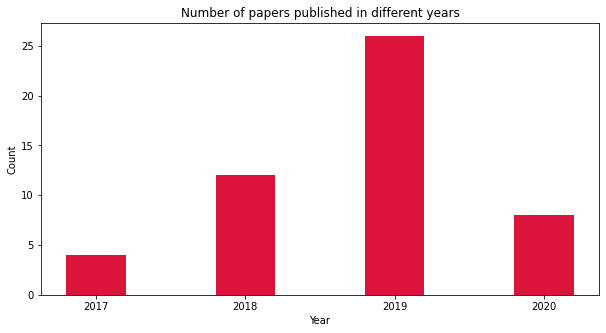

['Feb', 'Apr', 'Nov', 'Aug', 'Jan', 'Mar', 'May', 'Jun', 'Oct', 'Dec', 'Jul']


Text(0, 0.5, 'KEYWORD')

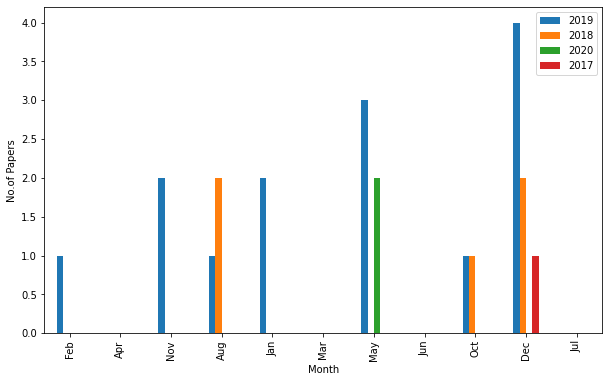

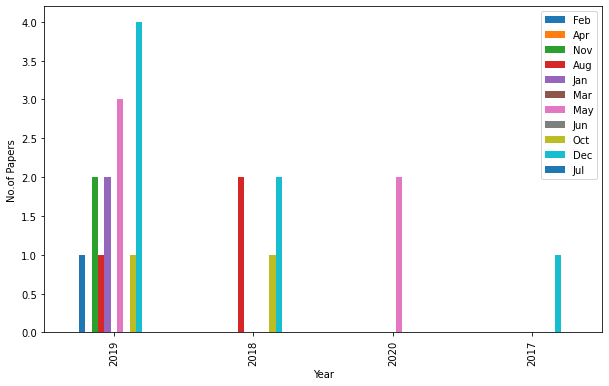

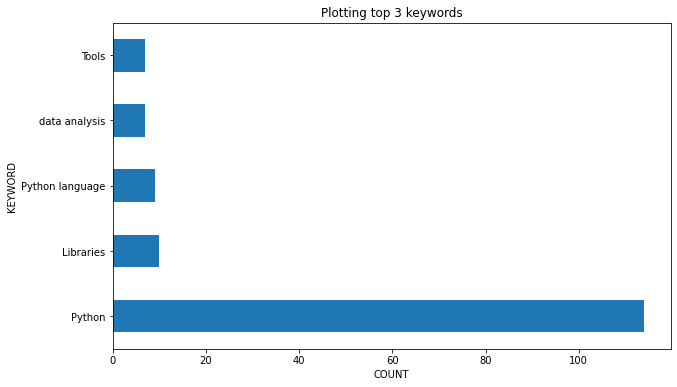

In [ ]:
import pandas as pd
import collections
import bibtexparser

from matplotlib import pyplot as plt

with open('SSD bibtexts IEEE.txt','r',encoding='utf8') as bibtex_file:
  bib_database = bibtexparser.load(bibtex_file)

# with open('SSD bibtexts ACM.txt','r',encoding='utf8') as bibtex_file:
#   bib_database = bibtexparser.load(bibtex_file)

df = pd.DataFrame(bib_database.entries)
df.describe()


pages_count = {}
df.pages
maxValue=0
for i in df.pages:
    try:
        x,y = map(int,i.split('-'))
        maxValue= max(maxValue,y-x)
    except:
        continue

if(maxValue>100):
  divider=10
elif(maxValue>50):
  divider=5
elif(maxValue>20):
  divider =2
else:
  divider=1
for i in df.pages:
    try:
        x,y = map(int,i.split('-'))
        if(divider!=1):
          temp=int((y-x)/divider)
          pageWidthCluster=str(temp*divider)+"-"+str(temp*divider+divider-1)
        else:
          pageWidthCluster=str(y-x)
        pages_count[pageWidthCluster] = pages_count.get(pageWidthCluster,0)+1
    except:
        continue

od = collections.OrderedDict(sorted(pages_count.items()))
plt.figure(figsize = (10, 5)) 
plt.bar(list( od.keys() ), list( od.values() ), color ='royalblue',  width = 0.4) 
  
plt.xlabel("Pages") 
plt.ylabel("Count") 
plt.title("Number of pages in different papers") 
plt.show() 

month_to_paper = dict()
monthsMapper = {'jan':'Jan',
                'january':'Jan',
          'feb':'Feb',
          'february':'Feb',
          'march':'Mar',
          'mar':'Mar',
          'april':'Apr',
          'apr':'Apr',
          'may':'May',
          'june':'Jun',
          'jun':'Jun',
          'july':'Jul',
          'jul':'Jul',
          'aug':'Aug',
          'august':'Aug',
          'sep':'Sep',
          'september':'Sep',
          'oct':'Oct',
          'october':'Oct',
          'november':'Nov',
          'nov':'Nov',
          'december':'Dec',
          'dec':'Dec'
}

for i in df.month.dropna():
    if i.lower() in monthsMapper:
      key=monthsMapper[i.lower()]
      month_to_paper[key] = month_to_paper.get(key,0)+1

fig = plt.figure(figsize = (10, 5)) 


months = ['Jan',
          'Feb',
          'Mar',
          'Apr',
          'May',
          'Jun',
          'Jul',
          'Aug',
          'Sep',
          'Oct',
          'Nov',
          'Dec']

month_num = dict(zip(months, range(12)))

def compareMonth(month):
    return month_num[month]
sorted_dict=dict(sorted(month_to_paper.items(), key=lambda x: compareMonth(x[0])))
plt.bar(list( sorted_dict.keys() ), list( sorted_dict.values() ), 
        color ='crimson',  
        width = 0.4) 

plt.xlabel("Month") 
plt.ylabel("Count") 
plt.title("Number of papers in different months") 
plt.show() 

#Year
year_to_paper = {}
for i in df.year.dropna():
    year_to_paper[i] = year_to_paper.get(i,0)+1

fig = plt.figure(figsize = (10, 5))
sorted_year = collections.OrderedDict(sorted(year_to_paper.items()))

plt.bar(list( sorted_year.keys() ), list( sorted_year.values() ), 
        color ='crimson',  
        width = 0.4) 
  
plt.xlabel("Year") 
plt.ylabel("Count") 
plt.title("Number of papers published in different years") 
plt.show() 


from wordcloud import WordCloud, STOPWORDS 

vocab = set()
vocab_w_freq = []
complexDict={}
# for i in range(len(df)) : 
#   print(df.loc[i, "Year"], df.loc[i, "Age"]) 
      
vocab = set( vocab_w_freq )

months = list(month_to_paper.keys())
print(months)

year_to_month_papers = dict()
for i in range(len(df)):
    if df.year[i] not in year_to_month_papers:
        year_to_month_papers[df.year[i]] = dict.fromkeys(months,0)
    else:
        try:
            year_to_month_papers[df.year[i]][df.month[i]] = year_to_month_papers[df.year[i]][df.month[i]]+1
        except:
            continue



df2 = pd.DataFrame(year_to_month_papers)

ax = df2.plot.bar(figsize=(10,6),title="Top 3 keywords")
ax.set_xlabel("Month")
ax.set_ylabel("No.of Papers")

ax = df2.T.plot.bar(figsize=(10,6),title="Top 3 keywords")
ax.set_xlabel("Year",)
ax.set_ylabel("No.of Papers")
plt.figure()
keywords = df['keywords'].str.split(';',expand=True)
keywords = keywords.stack().reset_index()
ax = keywords[0].value_counts()[:5].plot(kind='barh',title="Top 3 keywords",figsize=(10,6))
ax.set_xlabel("Count")
ax.set_ylabel("Keyword")





# Rishi

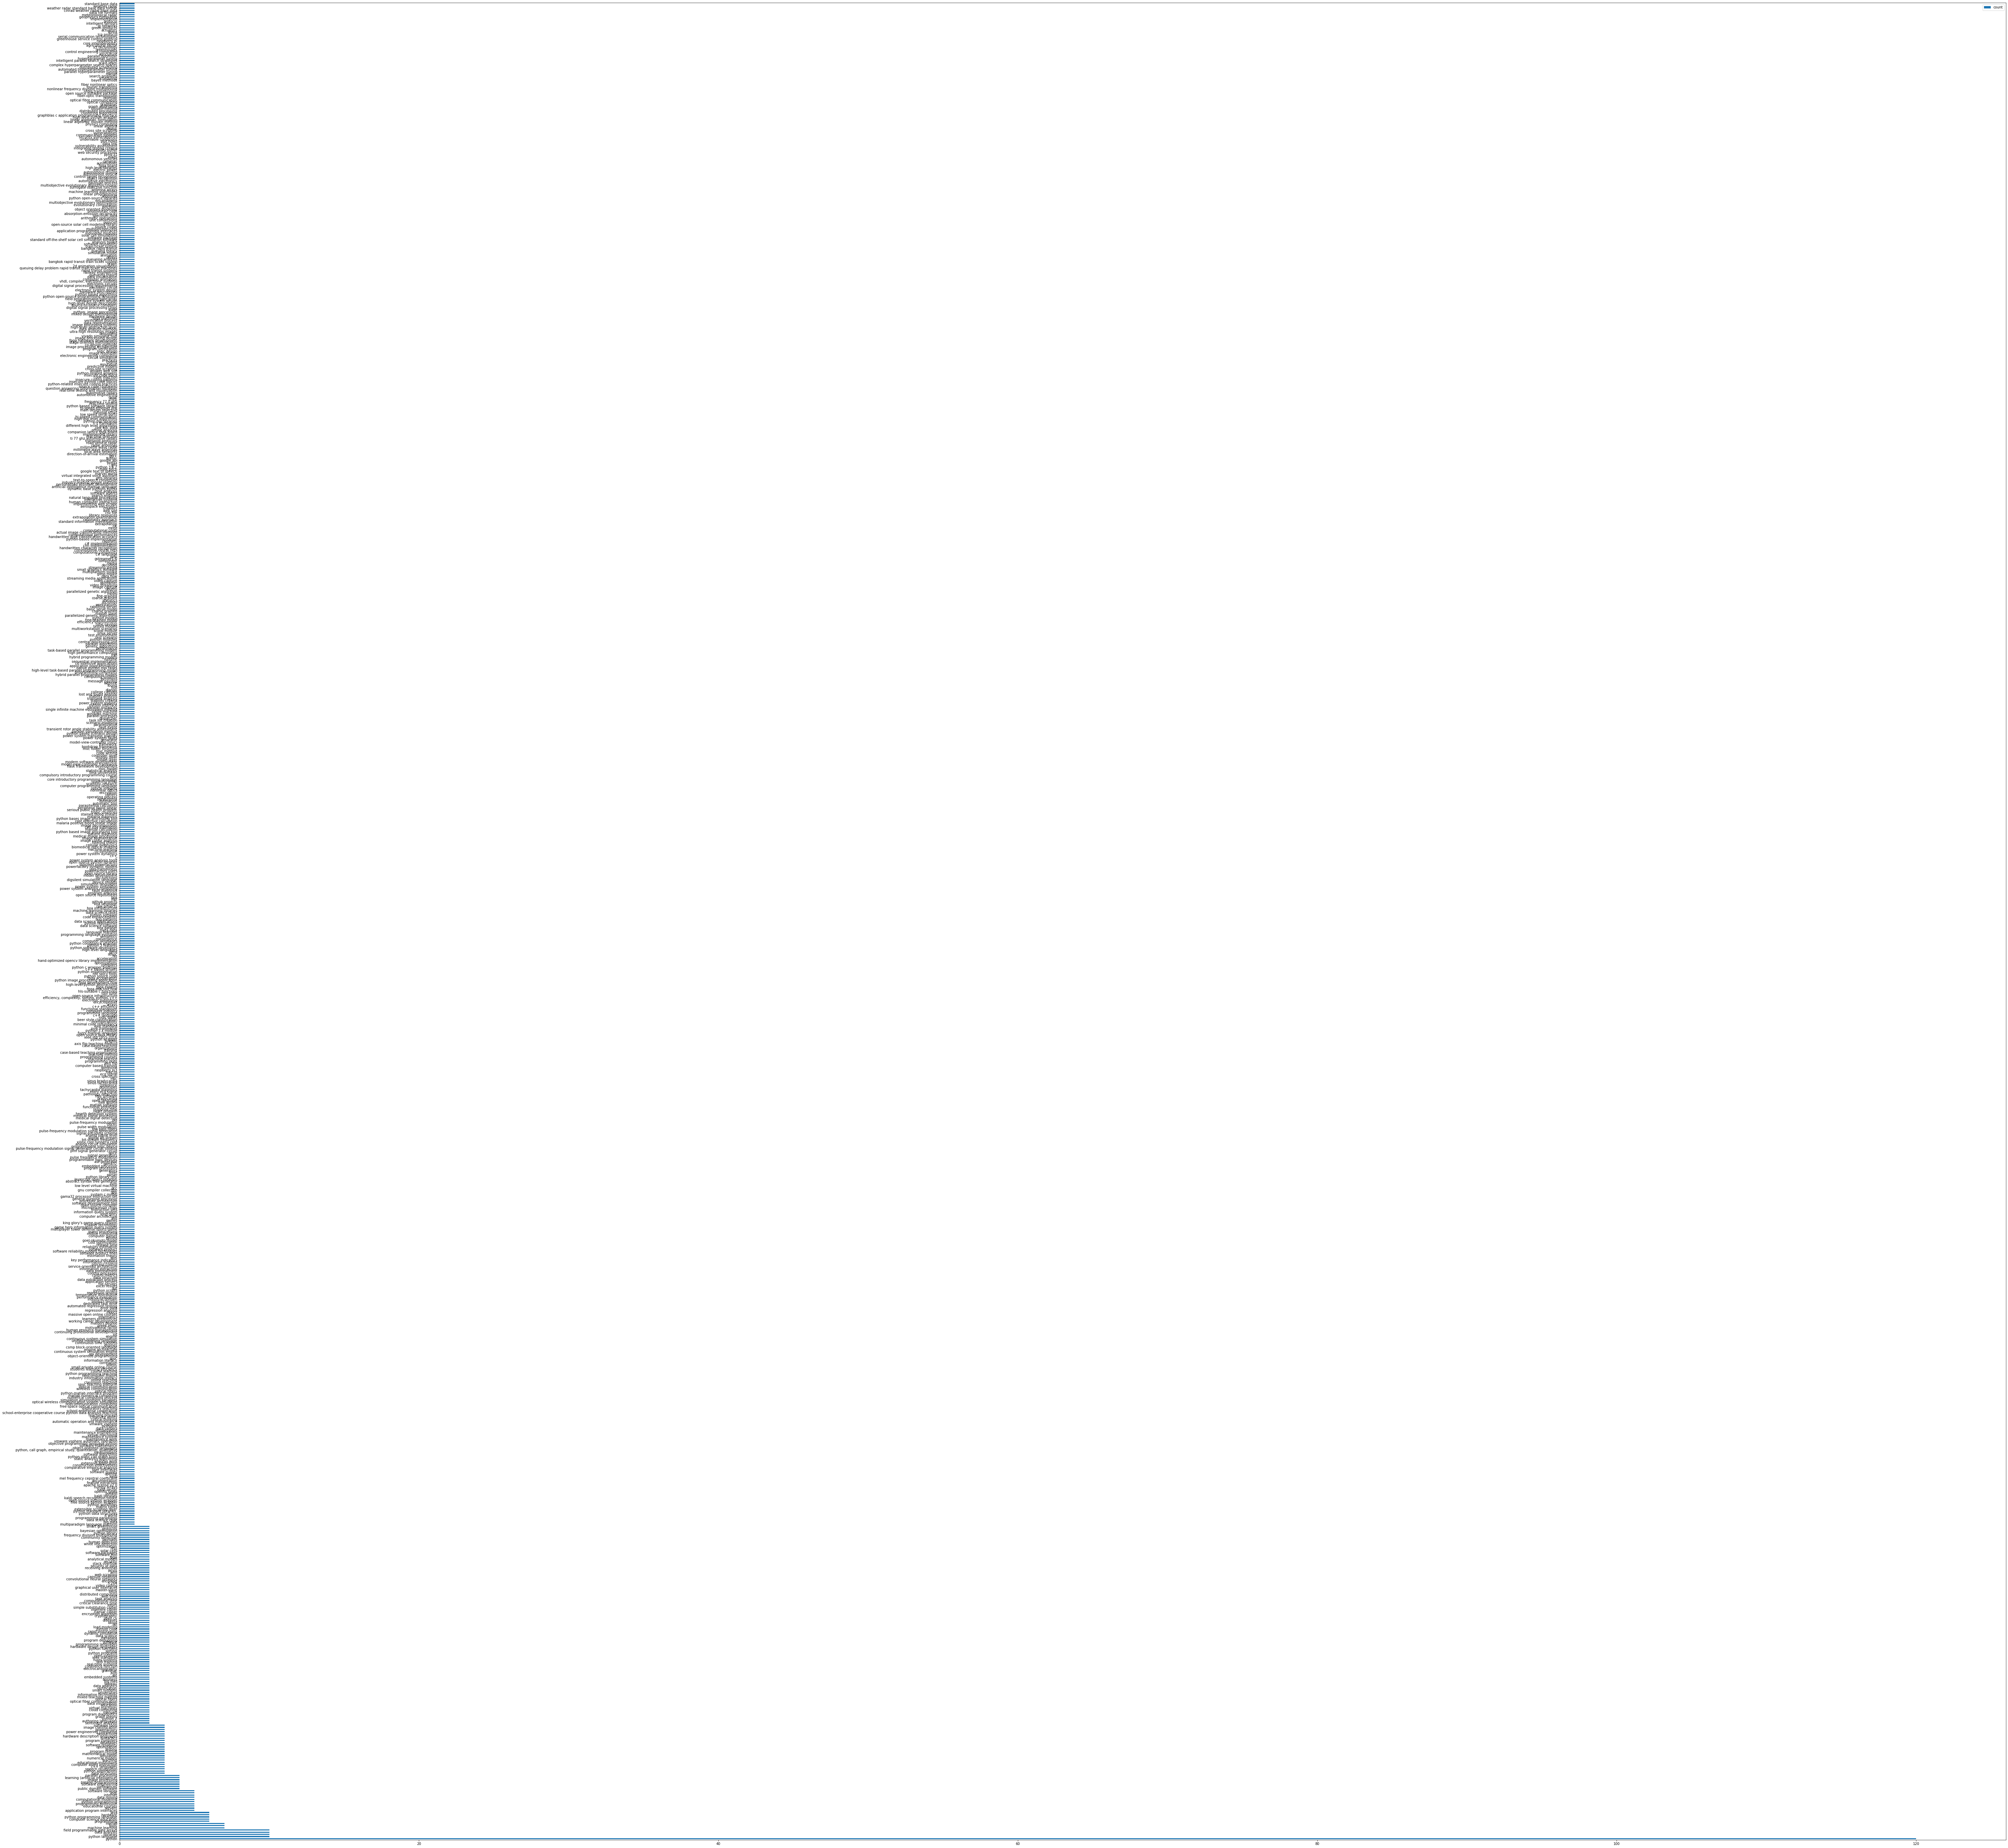

In [ ]:
from collections import OrderedDict
keyWordDict={}
for index, row in df.iterrows():
    for keyWord in row['keywords'].split(';'):
        lowercaseKey=keyWord.lower()
        if lowercaseKey not in keyWordDict:
          keyWordDict[lowercaseKey]={
              'count':1,
              'yearsMap':{
                  row['year'] :1
              }
          }
        else:
          oldMap=keyWordDict[lowercaseKey]
          oldMap['count']=oldMap['count']+1
          oldYearsMap=oldMap['yearsMap']
          oldYearsMap[row['year']]= oldYearsMap.get(row['year'],0)+1
          oldMap['yearsMap']=oldYearsMap
          keyWordDict[lowercaseKey]=oldMap


sortedKeyWord = OrderedDict(sorted(keyWordDict.items(), 
                                  key=lambda kv: kv[1]['count'], reverse=True))
df4 = pd.DataFrame(sortedKeyWord).T
df4.plot(kind='barh',figsize=(100,100))

# ROUGH SPACE

In [ ]:
df

,month,issn,doi,keywords,abstract,pages,number,volume,year,title,booktitle,author,ENTRYTYPE,ID,url,isbn,publisher
0,Feb,,10.1109/COMITCon.2019.8862251,Python;multiparadigm language platform;Big Dat...,This paper lights on Python amongst other diff...,248-251,,,2019,A Survey: How Python Pitches in IT-World,2019 International Conference on Machine Learn...,A. {Kumar} and S. P. {Panda},inproceedings,8862251,NaN,NaN,NaN
1,April,2379-190X,10.1109/ICASSP.2018.8462463,authoring languages;public domain software;Pyt...,"We present PyKaldi, a free and open-source Pyt...",5889-5893,,,2018,Pykaldi: A Python Wrapper for Kaldi,2018 IEEE International Conference on Acoustic...,D. {Can} and V. R. {Martinez} and P. {Papadopo...,inproceedings,8462463,NaN,NaN,NaN
2,Nov,2643-1572,10.1109/ASE.2019.00160,graph theory;program diagnostics;Python;softwa...,"In recent years, the extensive application of ...",1274-1276,,,2019,Empirical Study of Python Call Graph,2019 34th IEEE/ACM International Conference on...,L. {Yu},inproceedings,8952190,NaN,NaN,NaN
3,Aug,2325-0690,10.1109/ICAMechS.2018.8506789,application program interfaces;cloud computing...,A kind of automatic operation and maintenance ...,283-286,,,2018,Design of VMware vSphere Automatic Operation a...,2018 International Conference on Advanced Mech...,F. {Liu} and Z. {Yang},inproceedings,8506789,NaN,NaN,NaN
4,Aug,2473-9464,10.1109/ICCSE.2019.8845524,computer aided instruction;computer science ed...,To meet the needs of enterprises for data anal...,278-281,,,2019,School-Enterprise Cooperation on Python Data A...,2019 14th International Conference on Computer...,X. {Liu} and H. {Xu},inproceedings,8845524,NaN,NaN,NaN
5,Jan,,10.1109/ICGHIT.2019.00018,free-space optical communication;Matlab;Python...,This paper reports on the results of a develop...,46-48,,,2019,Development of Python-MATLAB Interface Program...,2019 International Conference on Green and Hum...,Y. {Hwang} and D. {Choi} and H. {An} and S. {S...,inproceedings,8866961,NaN,NaN,NaN
6,Sep.,,10.1109/ICISCAE48440.2019.221615,computer aided instruction;computer science ed...,With the development of information technology...,189-193,,,2019,Research and Application of Mixed Teaching Met...,2019 2nd International Conference on Informati...,S. {Zhou} and Z. {He} and N. {Xiong} and X. {Liu},inproceedings,9075799,NaN,NaN,NaN
7,March,,10.1109/INFOTEH48170.2020.9066334,application program interfaces;object-oriented...,This paper portrays the development of an simu...,1-5,,,2020,Development of a Continuous System Simulation ...,2020 19th International Symposium INFOTEH-JAHO...,T. {Naumovic} and M. {Despotovic-Zrakic} and B...,inproceedings,9066334,NaN,NaN,NaN
8,Sep.,,10.1109/LWMOOCS.2018.8534636,certification;computer aided instruction;compu...,This paper presents data about learners' prefe...,70-73,,,2018,Profiles and Motivations of Participants in Gr...,2018 Learning With MOOCS (LWMOOCS),G. {Psathas} and P. {Chalki} and S. {Demetriad...,inproceedings,8534636,NaN,NaN,NaN
9,May,,10.1109/RTEICT46194.2019.9016774,data analysis;program testing;Python;regressio...,Testing is of utmost importance in industrial ...,95-99,,,2019,Automated Regression Testing and Data Analytic...,2019 4th International Conference on Recent Tr...,P. {Dinesh Divsekar} and R. {Porob} and P. S. ...,inproceedings,9016774,NaN,NaN,NaN
